# (ProsperLoan Dataset)
## by (Abdelfattah Mohamed)

## Preliminary Wrangling

> Prosper is a financial company that matches investors and borrowers.

> The goal of this data analysis project is to understand the factors that are related to loans that were charged-off or defaulted.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
load_df = pd.read_csv('prosperLoanData.csv')
load_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?
There are 113937 rows in the dataset with 81 features. 
> Features || (Structure of dataset) || (Independent Variables):
- `ListingKey`
- `ListingCreationDate`
- `LoanOriginationDate`
- `DateCreditPulled`
- `ProsperRating`
- `Term`
- `ListingCategory`
- `LoanOriginalAmount`
- `BorrowerApr`
- `EstimatedReturn`
- `LoanStatus`	
- `StatedMonthlyIncome`	
- `IsBorrowerHomeowner`	
- `ProsperPrincipalBorrowed`	
- `ProsperPrincipalOutstanding`

### What is/are the main feature(s) of interest in your dataset?

> Currently, i can not define that, but after analysis, we will predict the best feature we can depend on it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The current analysis will investigate a group of borrowers' features along with the type of loan that will be analyzed to correctly understand which factors and features likely impact Prospero's final loan status.

 `Analysis below :`

In [3]:
load_df.shape

(113937, 81)

In [4]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

###### Data Cleaning


In [5]:
# Feature Extraction
features = ["ProsperScore","ListingKey","ListingCreationDate","LoanOriginationDate","DateCreditPulled","ProsperRating (Alpha)",
            "Term","ListingCategory (numeric)","LoanOriginalAmount","BorrowerAPR","EstimatedReturn","DebtToIncomeRatio","OpenRevolvingAccounts"
            ,"LoanStatus","StatedMonthlyIncome","IsBorrowerHomeowner","ProsperPrincipalBorrowed","EmploymentStatus",
            "ProsperPrincipalOutstanding","CurrentCreditLines","EmploymentStatusDuration","IncomeVerifiable"]
load_df[features].head()

,ProsperScore,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating (Alpha),Term,ListingCategory (numeric),LoanOriginalAmount,BorrowerAPR,...,OpenRevolvingAccounts,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,EmploymentStatus,ProsperPrincipalOutstanding,CurrentCreditLines,EmploymentStatusDuration,IncomeVerifiable
0,NaN,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00,2007-08-26 18:41:46.780000000,NaN,36,0,9425,0.16516,...,1,Completed,3083.333333,True,NaN,Self-employed,NaN,5.0,2.0,True
1,7.0,10273602499503308B223C1,2014-02-27 08:28:07.900000000,2014-03-03 00:00:00,2014-02-27 08:28:14,A,36,2,10000,0.12016,...,13,Current,6125.000000,False,NaN,Employed,NaN,14.0,44.0,True
2,NaN,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,2007-01-17 00:00:00,2007-01-02 14:09:10.060000000,NaN,36,0,3001,0.28269,...,0,Completed,2083.333333,False,NaN,Not available,NaN,NaN,NaN,True
3,9.0,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00,2012-10-22 11:02:32,A,36,16,10000,0.12528,...,7,Current,2875.000000,True,NaN,Employed,NaN,5.0,113.0,True
4,4.0,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,2013-09-20 00:00:00,2013-09-14 18:38:44,D,36,2,15000,0.24614,...,6,Current,9583.333333,True,11000.0,Employed,9947.9,19.0,44.0,True


In [6]:
load_df_copy = load_df[features]

In [7]:
# Rename Columns to be standard " CamalCase"
load_df_copy.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating',"ListingCategory (numeric)":"ListingCategory", "BorrowerAPR": "BorrowerApr"}, inplace = True)
load_df_copy.head()

G:\ProgramData\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ProsperScore,ListingKey,ListingCreationDate,LoanOriginationDate,DateCreditPulled,ProsperRating,Term,ListingCategory,LoanOriginalAmount,BorrowerApr,...,OpenRevolvingAccounts,LoanStatus,StatedMonthlyIncome,IsBorrowerHomeowner,ProsperPrincipalBorrowed,EmploymentStatus,ProsperPrincipalOutstanding,CurrentCreditLines,EmploymentStatusDuration,IncomeVerifiable
0,NaN,1021339766868145413AB3B,2007-08-26 19:09:29.263000000,2007-09-12 00:00:00,2007-08-26 18:41:46.780000000,NaN,36,0,9425,0.16516,...,1,Completed,3083.333333,True,NaN,Self-employed,NaN,5.0,2.0,True
1,7.0,10273602499503308B223C1,2014-02-27 08:28:07.900000000,2014-03-03 00:00:00,2014-02-27 08:28:14,A,36,2,10000,0.12016,...,13,Current,6125.000000,False,NaN,Employed,NaN,14.0,44.0,True
2,NaN,0EE9337825851032864889A,2007-01-05 15:00:47.090000000,2007-01-17 00:00:00,2007-01-02 14:09:10.060000000,NaN,36,0,3001,0.28269,...,0,Completed,2083.333333,False,NaN,Not available,NaN,NaN,NaN,True
3,9.0,0EF5356002482715299901A,2012-10-22 11:02:35.010000000,2012-11-01 00:00:00,2012-10-22 11:02:32,A,36,16,10000,0.12528,...,7,Current,2875.000000,True,NaN,Employed,NaN,5.0,113.0,True
4,4.0,0F023589499656230C5E3E2,2013-09-14 18:38:39.097000000,2013-09-20 00:00:00,2013-09-14 18:38:44,D,36,2,15000,0.24614,...,6,Current,9583.333333,True,11000.0,Employed,9947.9,19.0,44.0,True


In [8]:
load_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ProsperScore                 84853 non-null   float64
 1   ListingKey                   113937 non-null  object 
 2   ListingCreationDate          113937 non-null  object 
 3   LoanOriginationDate          113937 non-null  object 
 4   DateCreditPulled             113937 non-null  object 
 5   ProsperRating                84853 non-null   object 
 6   Term                         113937 non-null  int64  
 7   ListingCategory              113937 non-null  int64  
 8   LoanOriginalAmount           113937 non-null  int64  
 9   BorrowerApr                  113912 non-null  float64
 10  EstimatedReturn              84853 non-null   float64
 11  DebtToIncomeRatio            105383 non-null  float64
 12  OpenRevolvingAccounts        113937 non-null  int64  
 13 

In [9]:
load_df_copy.describe()

,ProsperScore,Term,ListingCategory,LoanOriginalAmount,BorrowerApr,EstimatedReturn,DebtToIncomeRatio,OpenRevolvingAccounts,StatedMonthlyIncome,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,CurrentCreditLines,EmploymentStatusDuration
count,84853.000000,113937.000000,113937.000000,113937.00000,113912.000000,84853.000000,105383.000000,113937.00000,1.139370e+05,22085.000000,22085.000000,106333.000000,106312.000000
mean,5.950067,40.830248,2.774209,8337.01385,0.218828,0.096068,0.275947,6.96979,5.608026e+03,8472.311961,2930.313906,10.317192,96.071582
std,2.376501,10.436212,3.996797,6245.80058,0.080364,0.030403,0.551759,4.63097,7.478497e+03,7395.507650,3806.635075,5.457866,94.480605
min,1.000000,12.000000,0.000000,1000.00000,0.006530,-0.182700,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.000000,36.000000,1.000000,4000.00000,0.156290,0.074080,0.140000,4.00000,3.200333e+03,3500.000000,0.000000,7.000000,26.000000
50%,6.000000,36.000000,1.000000,6500.00000,0.209760,0.091700,0.220000,6.00000,4.666667e+03,6000.000000,1626.550000,10.000000,67.000000
75%,8.000000,36.000000,3.000000,12000.00000,0.283810,0.116600,0.320000,9.00000,6.825000e+03,11000.000000,4126.720000,13.000000,137.000000
max,11.000000,60.000000,20.000000,35000.00000,0.512290,0.283700,10.010000,51.00000,1.750003e+06,72499.000000,23450.950000,59.000000,755.000000


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

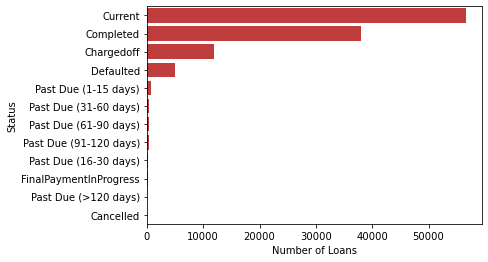

In [10]:
"""
Plotting LOAN Status
"""
default_color = sb.color_palette()[3]

# Order by the categorical variable 
cat_order = load_df_copy['LoanStatus'].value_counts().index

sb.countplot(data = load_df_copy, y = 'LoanStatus', color = default_color, order=cat_order)
plt.xlabel('Number of Loans')
plt.ylabel('Status');

In [11]:
"""
Check the percentage of loans in each status
"""
pct_loans_by_status = pd.DataFrame(load_df_copy.groupby('LoanStatus')['LoanStatus'].count())
pct_loans_by_status['PctLoans'] = (pct_loans_by_status['LoanStatus']/pct_loans_by_status['LoanStatus'].sum())*100
pct_loans_by_status.sort_values(by='PctLoans', ascending=False)

,LoanStatus,PctLoans
LoanStatus,,
Current,56576,49.655511
Completed,38074,33.416713
Chargedoff,11992,10.525115
Defaulted,5018,4.404188
Past Due (1-15 days),806,0.707408
Past Due (31-60 days),363,0.318597
Past Due (61-90 days),313,0.274713
Past Due (91-120 days),304,0.266814
Past Due (16-30 days),265,0.232585


In [12]:
"""
Group all Pervious Due loans under an `unique status`
"""
load_df_copy['LoanStatus'] = load_df_copy['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
loan_status_dict = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

ordered_loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = loan_status_dict)

load_df_copy['LoanStatus'] = load_df_copy['LoanStatus'].astype(ordered_loan_status)

<ipython-input-12-10c6c89e17e9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df_copy['LoanStatus'] = load_df_copy['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')
<ipython-input-12-10c6c89e17e9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  load_df_copy['LoanStatus'] = load_df_copy['LoanStatus'].astype(ordered_loan_status)


In [13]:
# Check the percentage of loans in each status
pct_loans_by_status = pd.DataFrame(load_df_copy.groupby('LoanStatus')['LoanStatus'].count())
pct_loans_by_status['PctLoans'] = (pct_loans_by_status['LoanStatus']/pct_loans_by_status['LoanStatus'].sum())*100
pct_loans_by_status.sort_values(by='PctLoans', ascending=False)

,LoanStatus,PctLoans
LoanStatus,,
Current,56576,49.657691
Completed,38074,33.418179
Chargedoff,11992,10.525577
Defaulted,5018,4.404382
Past Due,2067,1.814240
FinalPaymentInProgress,205,0.179932


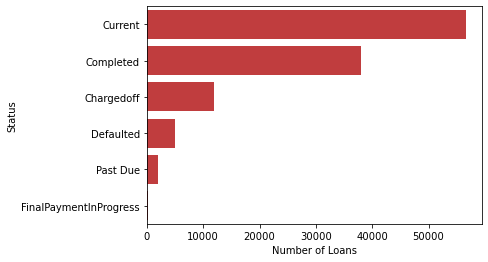

In [14]:
# Plot LoanStatus
default_color = sb.color_palette()[3]

# Order the categorical variable type
cat_order = load_df_copy['LoanStatus'].value_counts().index

sb.countplot(data = load_df_copy, y = 'LoanStatus', color = default_color, order=cat_order)
plt.xlabel('Number of Loans')
plt.ylabel('Status');

> About  80% of all Prosper loans are either current or completed. Among them, almost 50% are active and being paid by Prosper's borrowers. However, about 15% of Prosper's loans were "charged-off or defaulted".

> During this analysis, we'll try to undercover which of the features listed above may contribute to 15% of charged-off and defaulted loans.

- `Let's first analyze the distribution of Prosper's borrower's risk.`

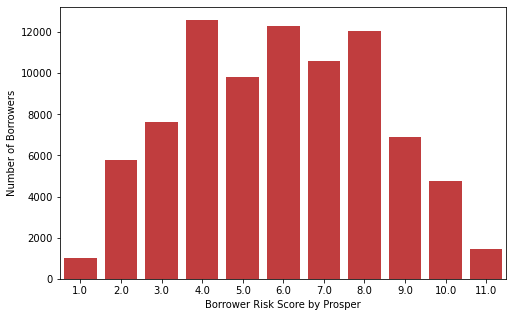

In [15]:
# Plot a standard-scaled plot for Prosper's score
binsize = 1
bins = np.arange(0, load_df_copy['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
sb.countplot(data = load_df_copy, x = 'ProsperScore', color = default_color)
plt.xlabel('Borrower Risk Score by Prosper')
plt.ylabel('Number of Borrowers');

- `Analyzing the distribution of all Prosper's borrowers risk, we noticed that most of the borrowers' risk scores are between 2 and 10 points.`


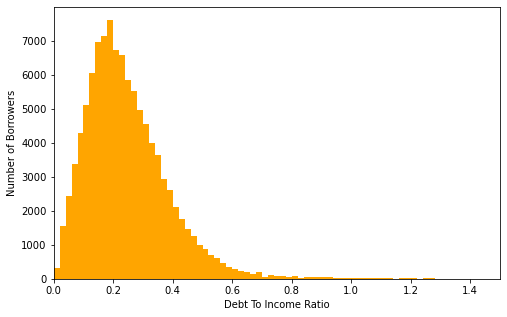

In [16]:
# Plot a standard-scaled plot for DebtToIncomeRatio

binsize = 0.02
bins = np.arange(0, load_df_copy['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = load_df_copy, x = 'DebtToIncomeRatio', bins = bins, color = "Orange")

plt.xlabel('Debt To Income Ratio')
plt.ylabel('Number of Borrowers')
plt.xlim(0,1.5);

> The above distribution shows that most of Prosper's borrowers have a debt to income ratio between zero & 1.And majority is between 0 and 0.4

- `Let's analyze this feature distribution`

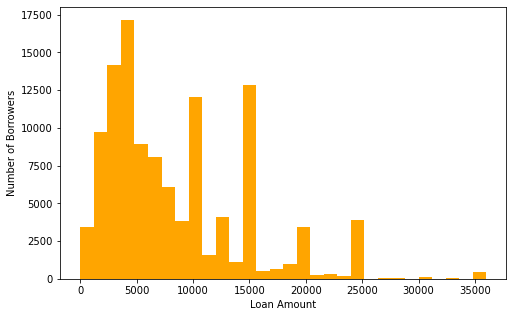

In [17]:
# Plot a standard-scaled plot for DebtToIncomeRatio

binsize = 1200
bins = np.arange(0, load_df_copy['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = load_df_copy, x = 'LoanOriginalAmount', bins = bins, color= "Orange")
plt.xlabel('Loan Amount')
plt.ylabel('Number of Borrowers');

- `Let's analyze the distribution of open revolving accounts and current credit lines.`

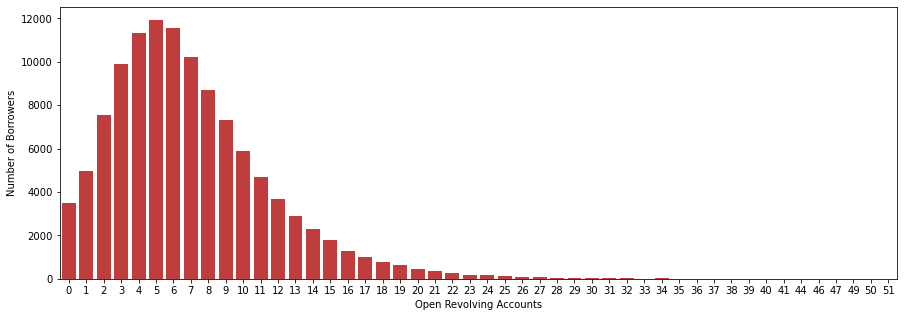

In [18]:
# Plot a standard-scaled plot for "OpenRevolvingAccounts"
default_color = sb.color_palette()[3]
plt.figure(figsize=[15, 5])

sb.countplot(data = load_df_copy, x = 'OpenRevolvingAccounts', color = default_color)
plt.xlabel('Open Revolving Accounts')
plt.ylabel('Number of Borrowers');

> Most of Prosper borrowers have at least two current lines of credit. It would be interesting to compare if loan statuses with the number of current lines of credit.
- ` let's take a look on listing categories`

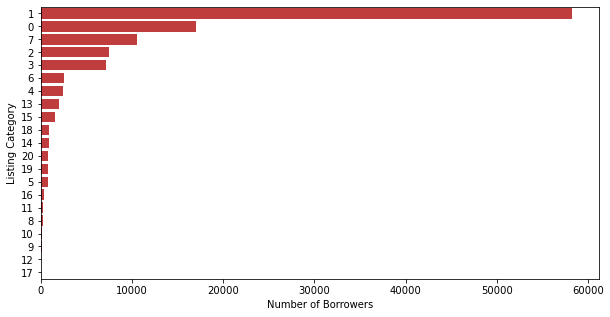

In [19]:
# Plotting a standard-scaled plot for ListingCategory
default_color = sb.color_palette()[3]
plt.figure(figsize=[10, 5])

# Order the categorical variable type
cat_order = load_df_copy['ListingCategory'].value_counts().index

sb.countplot(data = load_df_copy, y = 'ListingCategory', color = default_color, order=cat_order)
plt.ylabel('Listing Category')
plt.xlabel('Number of Borrowers');

In [20]:
# Decode ListingCategory (numeric) feature
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

load_df['ListingCategory'] = load_df['ListingCategory (numeric)'].map(list_dict)

In [21]:
# Look at the new ListingCategory feature
load_df[['ListingCategory (numeric)', 'ListingCategory']].sample(10)

,ListingCategory (numeric),ListingCategory
10014,1,Debt Consolidation
4319,1,Debt Consolidation
14683,3,Business
3158,1,Debt Consolidation
94739,0,Not Available
49817,0,Not Available
107979,1,Debt Consolidation
93060,1,Debt Consolidation
8868,7,Other
46125,1,Debt Consolidation


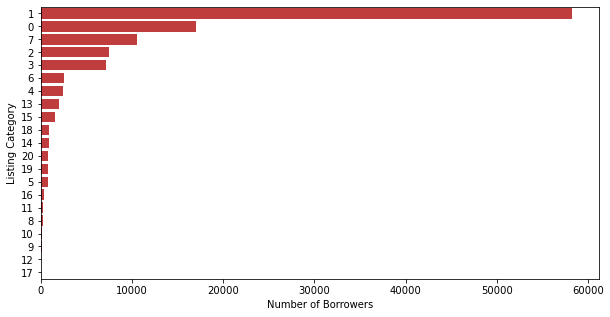

In [22]:
# Plotting a standard-scaled plot for ListingCategory
default_color = sb.color_palette()[3]
plt.figure(figsize=[10, 5])

# Order the categorical variable type
cat_order = load_df_copy['ListingCategory'].value_counts().index

sb.countplot(data = load_df_copy, y = 'ListingCategory', color = default_color, order=cat_order)
plt.ylabel('Listing Category')
plt.xlabel('Number of Borrowers');

> No doubt that debt consolidation is the most popular type of listing/loan at Prosper. 

-`What we may want to know is if there is a particular listing which a high number of charged-off or defaulted loans.`



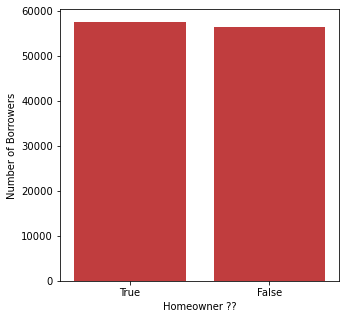

In [23]:
# Plot for IsBorrowerHomeowner
plt.figure(figsize=[5, 5])

# Order the categorical variable type
cat_order = load_df_copy['IsBorrowerHomeowner'].value_counts().index

sb.countplot(data = load_df_copy, x = 'IsBorrowerHomeowner', color = default_color, order=cat_order)
plt.xlabel('Homeowner ??')
plt.ylabel('Number of Borrowers');

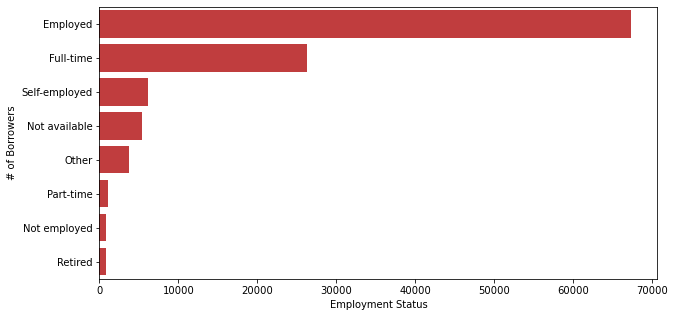

In [24]:
# Plot for EmploymentStatus
plt.figure(figsize=[10, 5])

# Order the categorical variable type
cat_order = load_df_copy['EmploymentStatus'].value_counts().index

sb.countplot(data = load_df_copy, y = 'EmploymentStatus', color = default_color, order=cat_order)
plt.xlabel('Employment Status')
plt.ylabel('# of Borrowers');

> It's interesting to notice the majority of borrowers do not have any *recommendations*.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The exploratory analysis showed that most of Prosper's borrowers have debt consolidation loans. Additionally, the amount lent by Proper to each customer is quite low .

>After analysis we conclude that  the average debt to income ratio is about 20% which indicates that Prosper does a good job of reducing their risk.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The loan or listing category indicates that most of Prosper loans are debt consolidation. Indicating that Prosper should do a better job to correctly classify its loans.

> Regarding loan status, we can observe that there are different past due categories with very few loans about 1.81%. So, I think consolidate all under a single category called *Past Due*.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [25]:
# Numberical vs Categorical features
numerical_vars = ['ProsperScore', 'EmploymentStatusDuration', 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount']
categorical_vars = ['LoanStatus', 'ListingCategory','EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable']

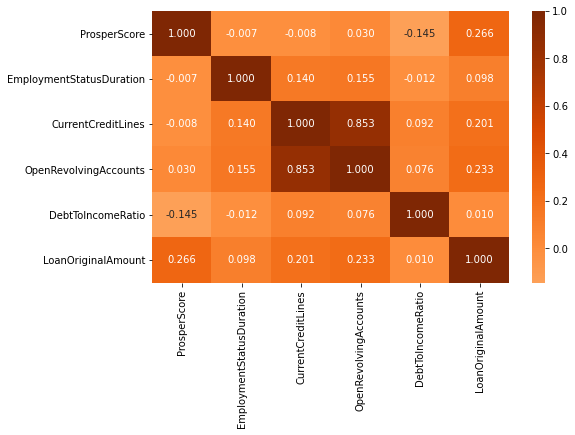

In [26]:
"""
CORRELATION
"""
# Correlation plot
default_color = sb.color_palette()[3]
plt.figure(figsize = [8, 5])
sb.heatmap(load_df_copy[numerical_vars].corr(), annot = True, fmt = '.3f', cmap = 'Oranges', center = 0)
plt.show()

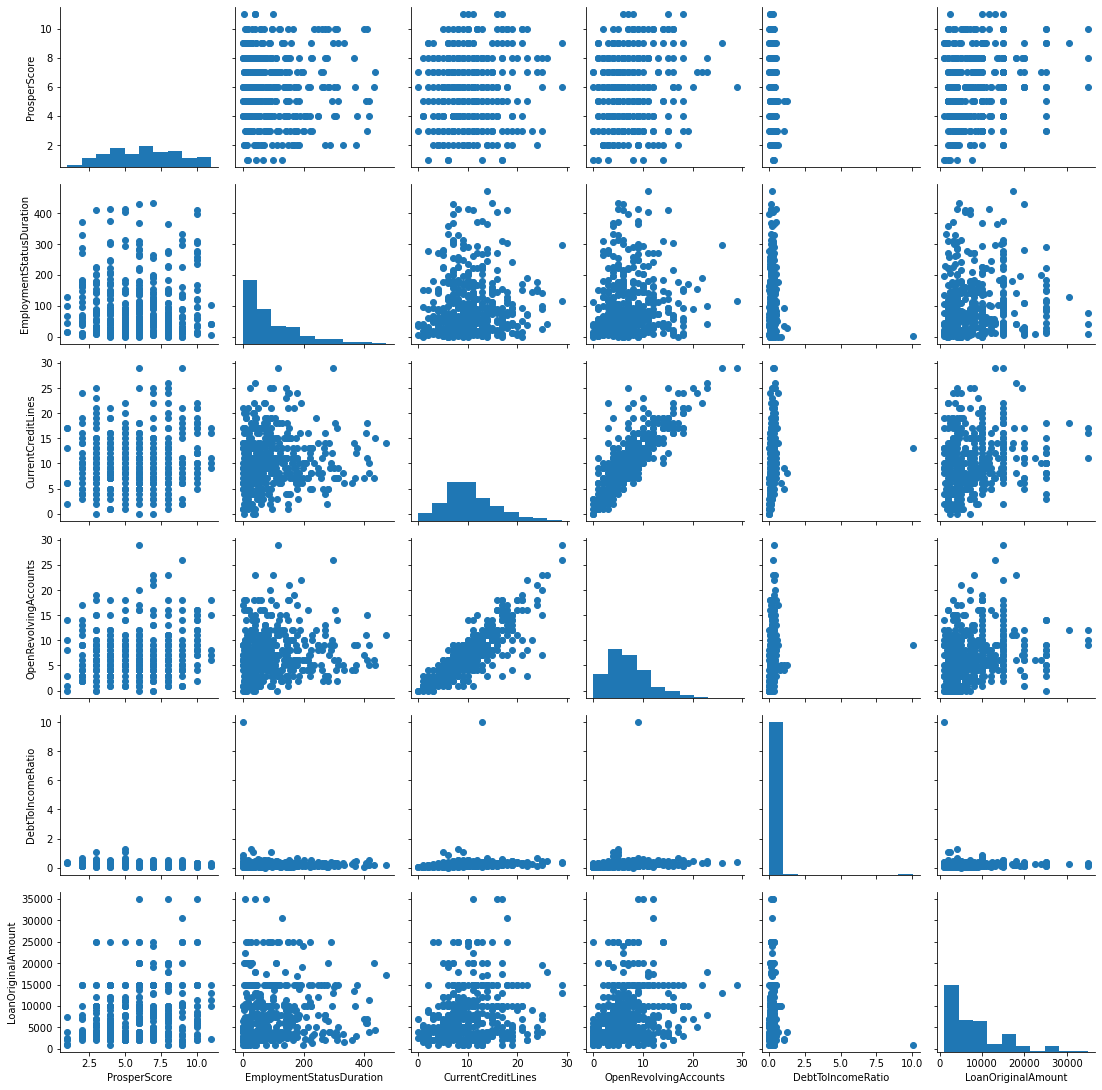

In [27]:
"""
Sample 500 loans so that plots are clearer and they render faster
"""
samples = np.random.choice(load_df_copy.shape[0], 500, replace = False)
loan_samples = load_df.loc[samples,features]

g = sb.PairGrid(data = loan_samples, vars = numerical_vars)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

> The *CurrentCreditLines* and *OpenRevolvingAccounts* dimensions are all highly correlated with one another

###### how these two variables correlate with the categorical variables LoanStatus ??

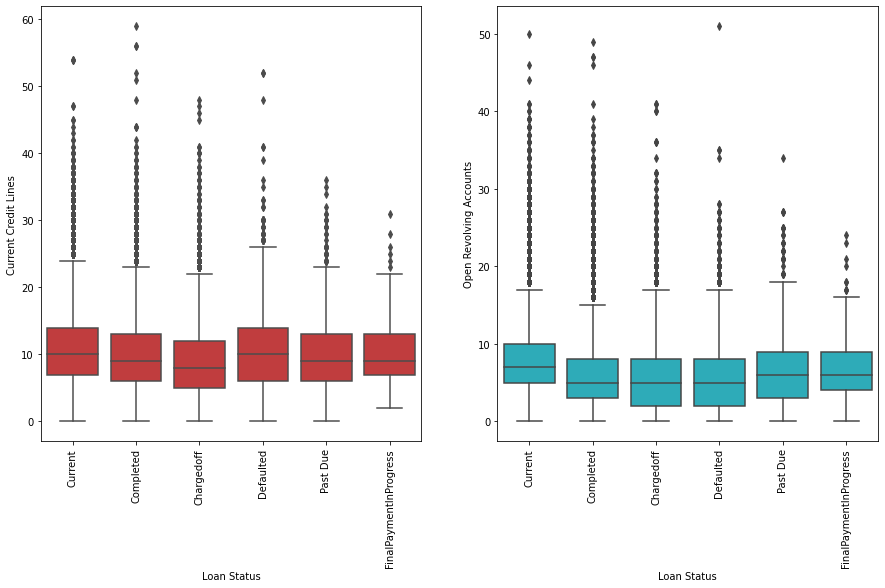

In [28]:
# Order the categorical variable LoanStatus
cat_order = load_df_copy['LoanStatus'].value_counts().index

# Define figure size
plt.figure(figsize = [15, 8])

# LoanStatus vs CurrentCreditLines on the left
default_color = sb.color_palette()[3]
plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data=load_df_copy, x='LoanStatus', y='CurrentCreditLines', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Current Credit Lines')
plt.xticks(rotation=90);

# LoanStatus vs OpenRevolvingAccounts on the right
default_color = sb.color_palette()[9]
plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data=load_df_copy, x='LoanStatus', y='OpenRevolvingAccounts', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Open Revolving Accounts')
plt.xticks(rotation=90);

> It appears that there isn't a significant difference between loan status and how many current credit lines or open revolving accounts borrowers have on this dataset. However, defaulted loans have a slight higher median current credit lines than others status.

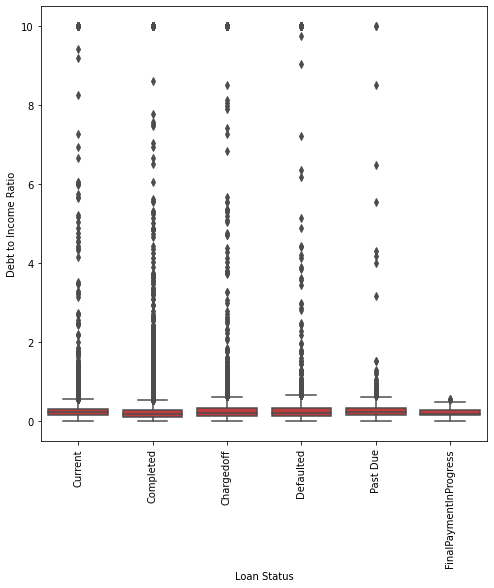

In [29]:
# Define figure size
plt.figure(figsize = [8, 8])

# LoanStatus vs DebtToIncomeRatio
default_color = sb.color_palette()[3]
ax1 = sb.boxplot(data=load_df_copy, x='LoanStatus', y='DebtToIncomeRatio', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.xticks(rotation=90);

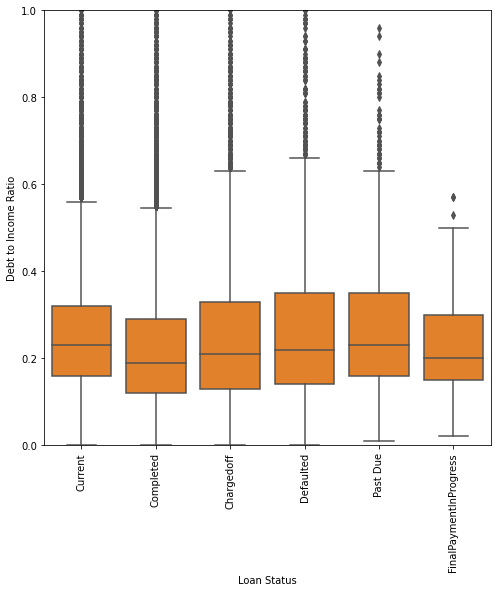

In [30]:
# LoanStatus vs DebtToIncomeRatio limiting y axes
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[1]

ax1 = sb.boxplot(data=load_df_copy, x='LoanStatus', y='DebtToIncomeRatio', color = default_color, order=cat_order)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.ylim(0,1)
plt.xticks(rotation=90);

> Despite the *outliers* , charged-off and defaulted loans have more borrowers with higher debt to income ratio that completed loans.

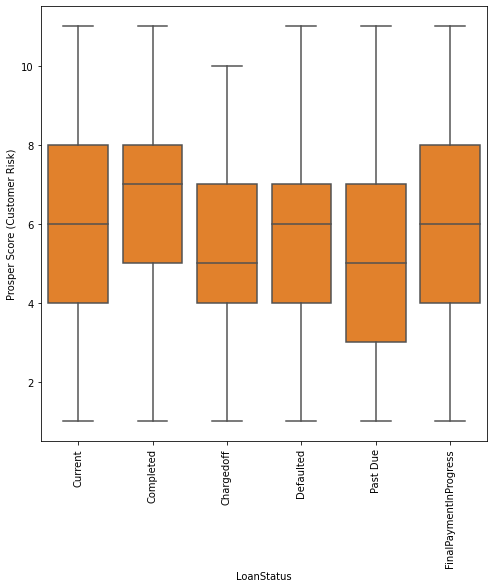

In [31]:
# LoanStatus vs ProsperScore
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[1]

ax2 = sb.boxplot(data=load_df_copy, x='LoanStatus', y='ProsperScore', color = default_color, order=cat_order)
plt.ylabel('Prosper Score (Customer Risk)')
plt.xticks(rotation=90);

> Unfortunately! ,  borrowers with higher prosper score completed their loans. Looking back at the relationship between prosper score and the remaining features chosen for this analysis, we can not explain this behaviour.

> We can also observe that charged-off loans have borrowers with lower median risk. Hence, Prosper should review its risk assessment procedure to make sure that it doesn't have any issues.

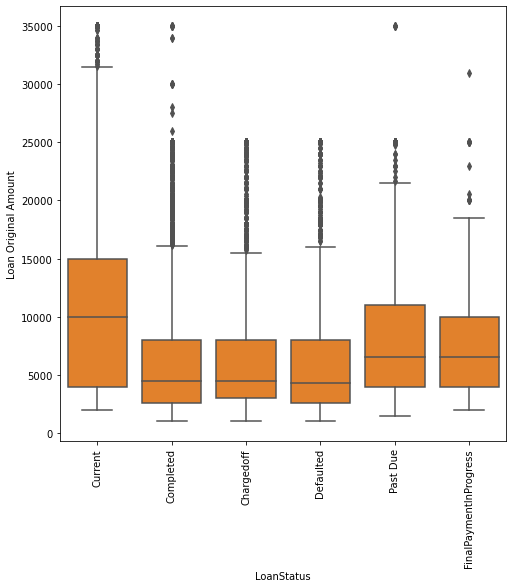

In [32]:
# LoanStatus vs LoanOriginalAmount
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[1]

ax2 = sb.boxplot(data=load_df_copy, x='LoanStatus', y='LoanOriginalAmount', color = default_color, order=cat_order)
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=90);

> Looking at completed, charged-off, and defaulted loans, we cannot observe differences between their median original loan amount. However, _current loans amount are bigger than the other_.

> So we should analyze the relationship between LoanStatus and the selected categorical features.

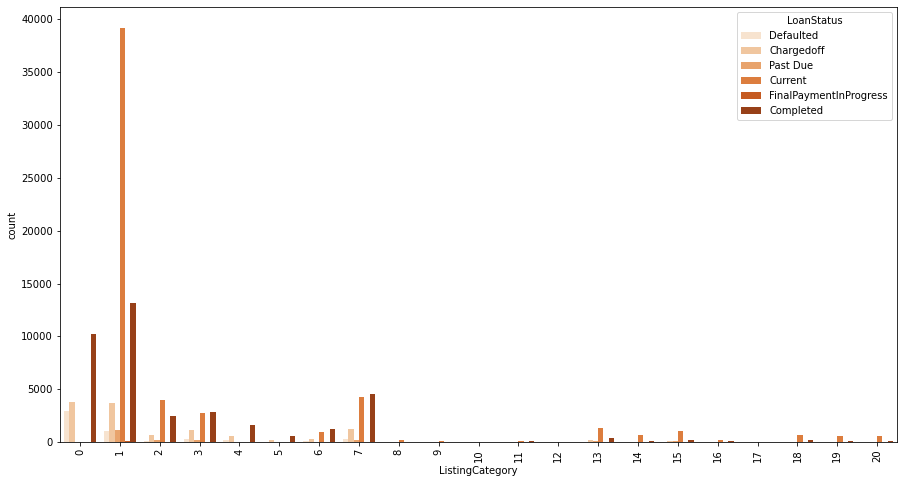

In [33]:
# LoanStatus vs ListingCategory

plt.figure(figsize = [15, 8])

sb.countplot(data = load_df_copy, x = 'ListingCategory', hue = 'LoanStatus', palette = 'Oranges')
plt.xticks(rotation=90);

> Conclude: This chart will consider only these LoanStatus.

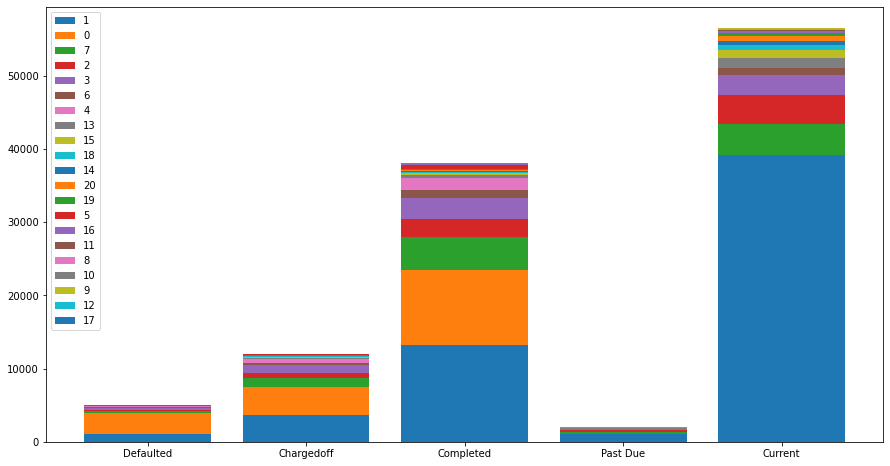

In [34]:
# LoanStatus vs ListingCategory: stacked bar chart, absolute counts
loan_cat_order = ['Defaulted', 'Chargedoff', 'Completed', 'Past Due', 'Current']
listing_cat_order = load_df_copy['ListingCategory'].value_counts().index

baselines = np.zeros(len(loan_cat_order))

plt.figure(figsize = [15, 8])

# for each second-variable category:
for i in range(len(listing_cat_order)):
# isolate the counts of the first category,
    listing_cat = listing_cat_order[i]
    inner_counts = load_df_copy[load_df_copy['ListingCategory'] == listing_cat]['LoanStatus'].value_counts()
# then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(loan_cat_order)), height = inner_counts[loan_cat_order],
            bottom = baselines)
    baselines += inner_counts[loan_cat_order]

plt.xticks(np.arange(len(loan_cat_order)), loan_cat_order)
plt.legend(listing_cat_order);

> The majority of current listing are Debt Consolidation.

> Defaulted and Charged-off loans have a high number of Not Available and Other listing types, which should be fixed by Prosper to _allow a better analysis of the relationship between LoanStatus and ListingCategory_.



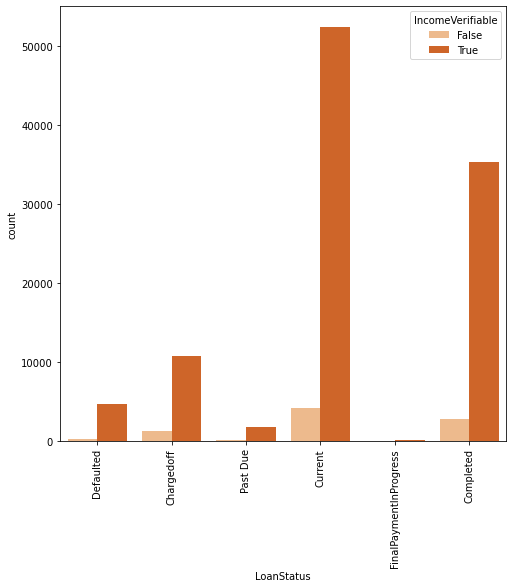

In [35]:
"""
The relationship between LoanStatus and two more categorical variables: 
    IsBorrowerHomeOwner and IncomeVerifiable.
"""
# 1) LoanStatus vs IncomeVerifiable
plt.figure(figsize = [8, 8])

sb.countplot(data = load_df_copy, x = 'LoanStatus', hue = 'IncomeVerifiable', palette = 'Oranges')
plt.xticks(rotation=90);

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

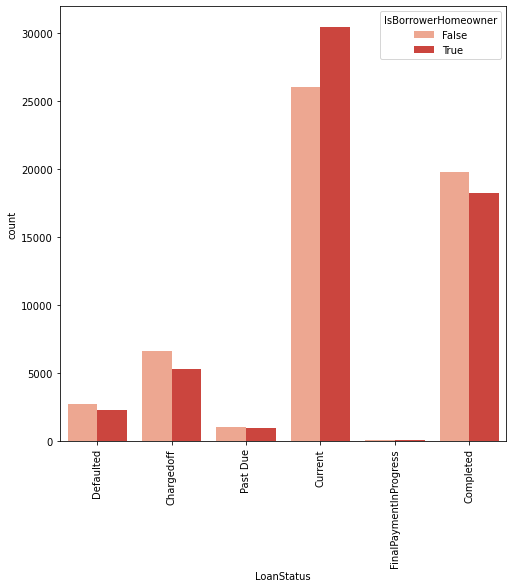

In [36]:
# LoanStatus vs IsBorrowerHomeOwner
plt.figure(figsize = [8, 8])

sb.countplot(data = load_df_copy, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Reds')
plt.xticks(rotation=90)

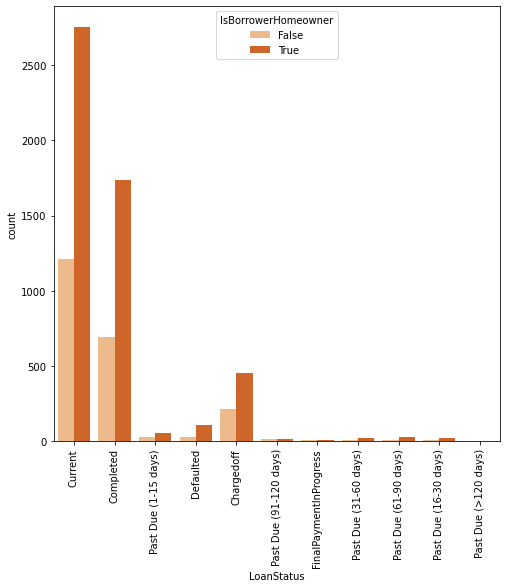

In [37]:
# 3) LoanStatus vs IsBorrowerHomeOwner for Home Improvement loans
plt.figure(figsize = [8, 8])

sb.countplot(data = load_df[load_df['ListingCategory'] == 'Home Improvement'], x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Oranges')
plt.xticks(rotation=90);

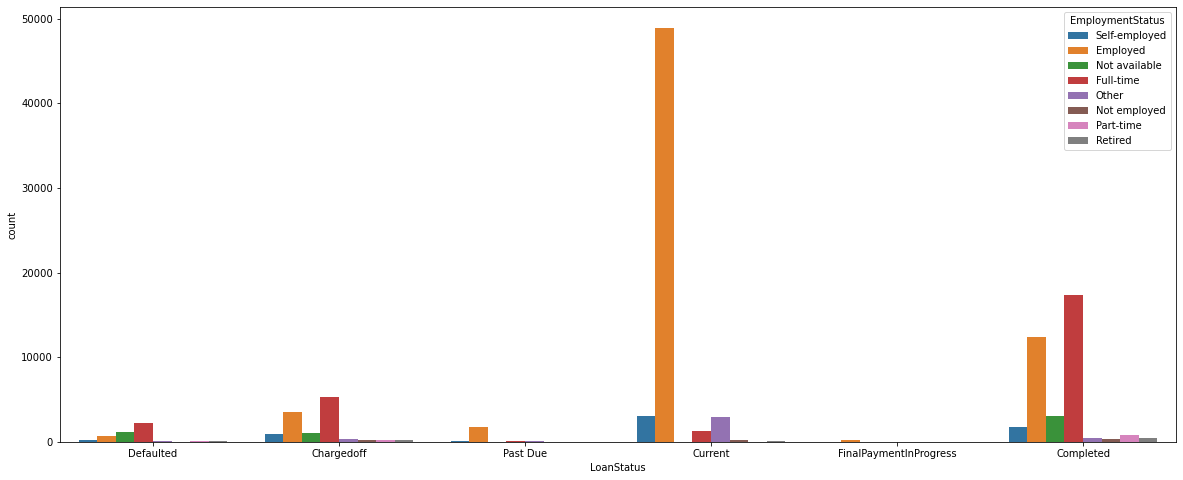

In [38]:
# LoanStatus vs EmploymentStatus
plt.figure(figsize = [20, 8])

sb.countplot(data = load_df_copy, x = 'LoanStatus', hue = 'EmploymentStatus');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> First, As expected, loans completed or about to be finalized presented the lower debt to income ratio than the remaining loan status.

> Secondly, current loans have a higher original loan amount than the other statuses. Here, I think  further investigation alongside Prosper's business analysts to understand if people are getting higher loans or this phenomenon is due to external factors, such as macro-economic ones or not!

> Finally, employed borrowers had the highest amount of charged-off loans that borrowers under the remaining employment status. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> After investigating the *correlation between the numerical features* , we can observe a positive relationship between proper score, the borrower risk attributed, and the original loan amount which means It may indicate that bigger loans could increase *Prosper's risk*. we also notice that a higher number of current credit lines led to a higher number of revolving accounts.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

G:\ProgramData\Anaconda\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
G:\ProgramData\Anaconda\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


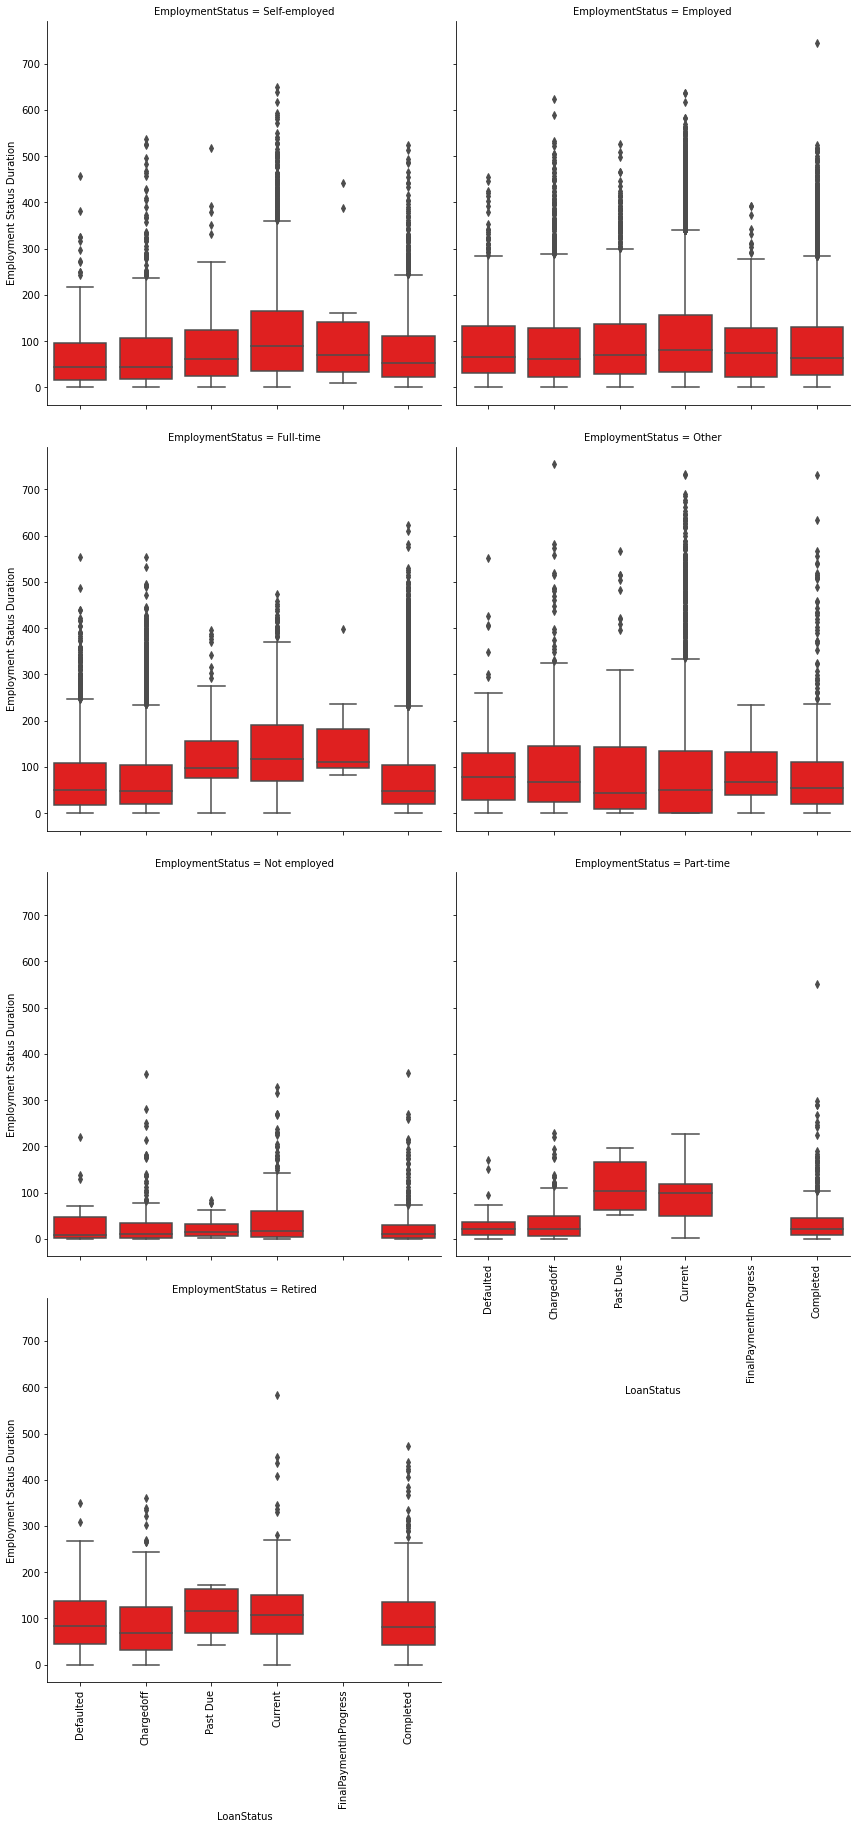

In [39]:
# LoanStatus vs EmploymentStatus vs EmploymentStatusDuration: create faceted heat maps on levels of the color variable
d = {'color': ['r', 'b']}

valid_employment = load_df_copy[load_df_copy['EmploymentStatus'] != 'Not available'][['LoanStatus', 'EmploymentStatus', 'EmploymentStatusDuration']]

g = sb.FacetGrid(data = valid_employment,
                 col = 'EmploymentStatus',
                 col_wrap = 2, 
                 size = 6, 
                 dropna=True,
                 legend_out=True,
                 hue_kws=d)
g.map(sb.boxplot, 'LoanStatus', 'EmploymentStatusDuration')
g.set_xlabels()
g.set_ylabels('Employment Status Duration')
g.set_xticklabels(rotation=90)

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> First, Looking at the employment status duration, we noticed that non-employed borrowers have more current loans than loans in the remaining statuses. 

> Secondly, clients who have part-time jobs for longer also have more past due loans.

### Were there any interesting or surprising interactions between features?

> I thought a higher contribution of some actors, such as non-employed borrowers and debt to income ratio, on charged-off and defaulted loans. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [40]:
# Converting this report to html format
from subprocess import call
call(['python', '-m', 'nbconvert', 'prosperLoan_data_exploration.ipynb'])

4294967295